In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imutils import paths
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
import sklearn
print(sklearn.__version__)


1.6.1


In [ ]:
image_path = list(paths.list_images("/content/drive/MyDrive/train/Oil Spill"))

In [ ]:
image_path

['/content/drive/MyDrive/train/Oil Spill/AUG_oil_spill00609.jpg',
 '/content/drive/MyDrive/train/Oil Spill/AUG_oil_spill00603.jpg',
 '/content/drive/MyDrive/train/Oil Spill/AUG_oil_spill00677.jpg',
 '/content/drive/MyDrive/train/Oil Spill/AUG_oil_spill00596.jpg',
 '/content/drive/MyDrive/train/Oil Spill/AUG_oil_spill00589.jpg',
 '/content/drive/MyDrive/train/Oil Spill/AUG_oil_spill00565.jpg',
 '/content/drive/MyDrive/train/Oil Spill/AUG_oil_spill00583.jpg',
 '/content/drive/MyDrive/train/Oil Spill/AUG_oil_spill00688.jpg',
 '/content/drive/MyDrive/train/Oil Spill/AUG_oil_spill00683.jpg',
 '/content/drive/MyDrive/train/Oil Spill/AUG_oil_spill00768.jpg',
 '/content/drive/MyDrive/train/Oil Spill/AUG_oil_spill00715.jpg',
 '/content/drive/MyDrive/train/Oil Spill/AUG_oil_spill00815.jpg',
 '/content/drive/MyDrive/train/Oil Spill/AUG_oil_spill00824.jpg',
 '/content/drive/MyDrive/train/Oil Spill/AUG_oil_spill00727.jpg',
 '/content/drive/MyDrive/train/Oil Spill/AUG_oil_spill00757.jpg',
 '/content

In [ ]:
len(image_path)

1409

array([[[233, 205, 171],
        [233, 205, 171],
        [233, 205, 171],
        ...,
        [243, 214, 187],
        [243, 214, 187],
        [243, 214, 187]],

       [[234, 206, 172],
        [234, 206, 172],
        [234, 206, 172],
        ...,
        [242, 213, 186],
        [242, 213, 186],
        [242, 213, 186]],

       [[234, 206, 172],
        [234, 206, 172],
        [234, 206, 172],
        ...,
        [242, 213, 186],
        [242, 213, 186],
        [242, 213, 186]],

       ...,

       [[145, 112,  73],
        [144, 111,  72],
        [147, 111,  75],
        ...,
        [ 94,  82,  76],
        [ 92,  80,  74],
        [ 90,  78,  72]],

       [[144, 110,  74],
        [143, 109,  73],
        [146, 110,  74],
        ...,
        [ 95,  83,  77],
        [ 97,  85,  79],
        [ 99,  87,  81]],

       [[141, 109,  74],
        [136, 104,  69],
        [140, 105,  71],
        ...,
        [100,  88,  82],
        [108,  96,  90],
        [109,  97,  91]]], dtype=uint8)
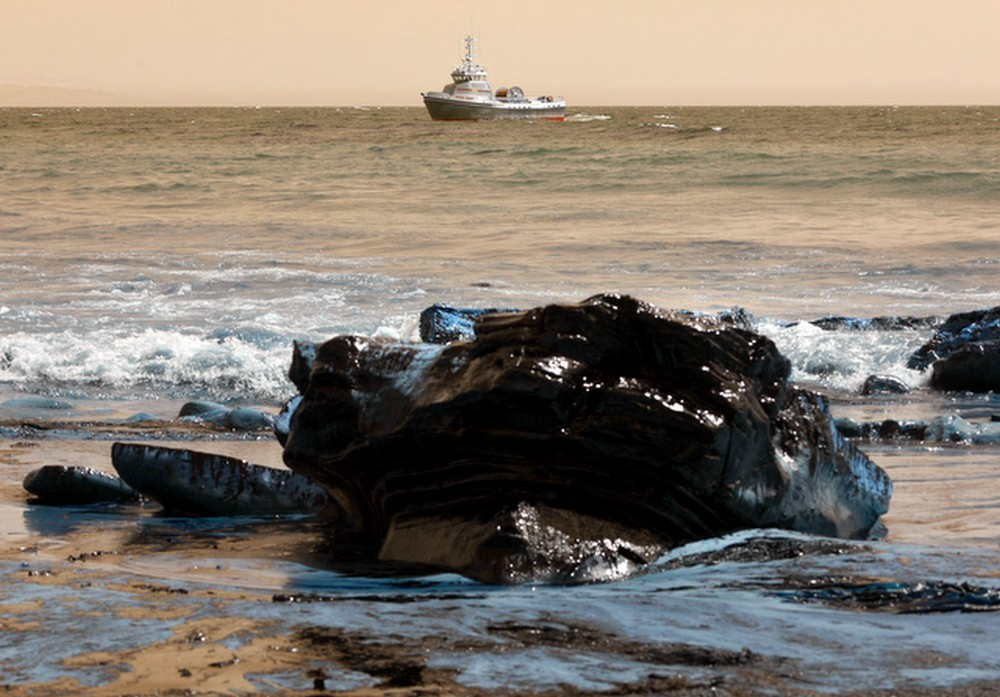

In [ ]:
image = cv2.imread(image_path[795])
image

In [ ]:
# Converting all images into numpy array
image_num_data=list()
for i in range(len(image_path)):
  image = cv2.imread(image_path[i])
  # Let us resize the image
  image=cv2.resize(src=image,dsize=(150,150), interpolation=cv2.INTER_LINEAR)
  image_num=np.array(image)
  image_flat=image_num.flatten()
  image_num_data.append(image_flat)

In [ ]:
# Lets us check the datatype of image_num_data
type(image_num_data)

list

In [ ]:
# Converting into numpy array
image_array = np.array(image_num_data)
image_array

array([[248, 245, 237, ..., 128,  95,  21],
       [255, 255, 255, ...,  17,  34,  49],
       [ 46,  37,  33, ..., 186, 171, 173],
       ...,
       [198, 243, 252, ..., 240, 242, 250],
       [255, 255, 255, ...,  44,  70,  97],
       [255, 251, 243, ..., 108, 102, 108]], dtype=uint8)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=1000,random_state=42)
x_reduced=pca.fit_transform(image_array)

In [ ]:
df = pd.DataFrame(x_reduced)
df = df.sample(frac = 1, random_state=42, ignore_index = True)
df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-4430.526448,-6956.641236,-4754.865200,-4033.089371,1312.129382,-2074.475859,2687.089574,-1662.671034,3620.267547,-840.848316,...,-2.691439e-15,3.119577e-16,-1.193026e-15,-2.017022e-15,1.385517e-15,1.397623e-17,-7.193489e-16,-1.869082e-15,3.648376e-15,-9.237656e-16
1,-16009.919867,250.122007,176.569993,-2886.699892,429.211884,36.731108,380.409643,-694.667581,655.592561,2800.267647,...,1.024420e-12,8.516512e-13,-6.597869e-13,3.160755e-13,-1.596758e-13,1.066191e-13,-4.104594e-13,4.623897e-13,1.200543e-12,-1.123044e-12
2,1568.980427,2150.961128,-419.135476,-9473.091759,2887.252317,-729.247699,-3491.247163,2380.506133,-2429.696003,-2815.815876,...,-4.211534e-14,-8.594932e-15,-3.981826e-13,-2.531584e-13,7.950271e-14,1.437748e-14,-3.880982e-13,-1.739515e-13,8.276021e-13,-7.062114e-13
3,20160.584460,3590.222197,4399.944007,221.981175,2614.816475,-4506.342980,440.490116,13.962106,149.351179,-1814.050666,...,1.175992e-12,8.043710e-13,-9.970401e-13,-1.159620e-12,1.163862e-12,9.054024e-13,1.314306e-12,-7.790996e-13,1.859242e-12,-4.629473e-14
4,-15555.060674,11014.133640,5081.471232,3842.619730,-982.168530,-1599.303914,256.777588,-5231.077731,-4654.657441,-2014.908656,...,2.743339e-13,-3.544660e-12,1.243252e-12,2.999912e-12,-1.327588e-12,1.428225e-12,-2.353110e-13,3.021539e-12,-1.995116e-12,3.224946e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,6151.891457,-3892.592137,794.299640,3101.692095,8716.845788,5008.309036,-1999.649360,682.765931,4760.284099,-4540.895507,...,-1.202151e-12,4.033824e-13,3.397362e-13,5.279781e-13,3.182195e-13,1.756985e-13,1.755021e-13,7.603079e-14,-1.646182e-13,-4.991709e-13
1405,14084.983477,-6762.231835,-2927.188183,2787.940320,-973.371948,-567.894844,-3356.339832,-3533.806975,-3241.599580,2103.197894,...,-2.691439e-15,3.119577e-16,-1.193026e-15,-2.017022e-15,1.385517e-15,1.397623e-17,-7.193489e-16,-1.869082e-15,3.648376e-15,-9.237656e-16
1406,15843.262763,-2263.486767,3170.624808,2115.262403,1442.848880,-2384.261378,3746.147070,2642.640512,-2323.391681,-161.216230,...,2.449801e-13,-2.142846e-13,2.715924e-13,-1.467986e-12,-1.758208e-13,7.148152e-13,-4.754278e-14,-7.602843e-13,1.438584e-13,-8.031697e-13
1407,-10517.202495,-11647.960346,1149.130595,1898.481146,889.439175,-32.842430,-1444.706856,314.474554,-3299.637662,-581.534070,...,2.053917e-12,1.881226e-12,7.883910e-13,8.625923e-15,3.134993e-12,1.698940e-12,-1.621693e-12,-1.049471e-12,2.437702e-12,-1.006469e-12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Columns: 1001 entries, 0 to target
dtypes: float64(1000), object(1)
memory usage: 10.8+ MB


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,target
0,-4430.526448,-6956.641236,-4754.865200,-4033.089371,1312.129382,-2074.475859,2687.089574,-1662.671034,3620.267547,-840.848316,...,3.119577e-16,-1.193026e-15,-2.017022e-15,1.385517e-15,1.397623e-17,-7.193489e-16,-1.869082e-15,3.648376e-15,-9.237656e-16,Oil Spilled
1,-16009.919867,250.122007,176.569993,-2886.699892,429.211884,36.731108,380.409643,-694.667581,655.592561,2800.267647,...,8.516512e-13,-6.597869e-13,3.160755e-13,-1.596758e-13,1.066191e-13,-4.104594e-13,4.623897e-13,1.200543e-12,-1.123044e-12,Oil Spilled
2,1568.980427,2150.961128,-419.135476,-9473.091759,2887.252317,-729.247699,-3491.247163,2380.506133,-2429.696003,-2815.815876,...,-8.594932e-15,-3.981826e-13,-2.531584e-13,7.950271e-14,1.437748e-14,-3.880982e-13,-1.739515e-13,8.276021e-13,-7.062114e-13,Oil Spilled
3,20160.584460,3590.222197,4399.944007,221.981175,2614.816475,-4506.342980,440.490116,13.962106,149.351179,-1814.050666,...,8.043710e-13,-9.970401e-13,-1.159620e-12,1.163862e-12,9.054024e-13,1.314306e-12,-7.790996e-13,1.859242e-12,-4.629473e-14,Oil Spilled
4,-15555.060674,11014.133640,5081.471232,3842.619730,-982.168530,-1599.303914,256.777588,-5231.077731,-4654.657441,-2014.908656,...,-3.544660e-12,1.243252e-12,2.999912e-12,-1.327588e-12,1.428225e-12,-2.353110e-13,3.021539e-12,-1.995116e-12,3.224946e-12,Oil Spilled


In [ ]:
df["target"]="Oil Spilled"

In [ ]:
image_path = list(paths.list_images("/content/drive/MyDrive/train/Non Oil Spill"))

In [ ]:
image_path

['/content/drive/MyDrive/train/Non Oil Spill/AUG_Non_oil_spill00707.jpg',
 '/content/drive/MyDrive/train/Non Oil Spill/AUG_Non_oil_spill00648.jpg',
 '/content/drive/MyDrive/train/Non Oil Spill/AUG_Non_oil_spill00654.jpg',
 '/content/drive/MyDrive/train/Non Oil Spill/AUG_Non_oil_spill00670.jpg',
 '/content/drive/MyDrive/train/Non Oil Spill/AUG_Non_oil_spill00626.jpg',
 '/content/drive/MyDrive/train/Non Oil Spill/AUG_Non_oil_spill00652.jpg',
 '/content/drive/MyDrive/train/Non Oil Spill/AUG_Non_oil_spill00674.jpg',
 '/content/drive/MyDrive/train/Non Oil Spill/AUG_Non_oil_spill00664.jpg',
 '/content/drive/MyDrive/train/Non Oil Spill/AUG_Non_oil_spill00642.jpg',
 '/content/drive/MyDrive/train/Non Oil Spill/AUG_Non_oil_spill00613.jpg',
 '/content/drive/MyDrive/train/Non Oil Spill/AUG_Non_oil_spill00605.jpg',
 '/content/drive/MyDrive/train/Non Oil Spill/AUG_Non_oil_spill00751.jpg',
 '/content/drive/MyDrive/train/Non Oil Spill/AUG_Non_oil_spill00765.jpg',
 '/content/drive/MyDrive/train/Non Oil

In [ ]:
len(image_path)

1400

array([[[129, 111,  88],
        [132, 114,  91],
        [130, 112,  89],
        ...,
        [120, 100,  75],
        [121, 101,  76],
        [121, 101,  76]],

       [[122, 104,  81],
        [122, 104,  81],
        [119, 101,  78],
        ...,
        [120, 100,  75],
        [120, 100,  75],
        [121, 101,  76]],

       [[125, 107,  84],
        [129, 111,  88],
        [129, 111,  88],
        ...,
        [120, 100,  75],
        [120, 100,  75],
        [121, 101,  76]],

       ...,

       [[ 59,  38,  17],
        [ 60,  39,  18],
        [ 61,  40,  19],
        ...,
        [ 66,  43,  21],
        [ 68,  44,  24],
        [ 68,  44,  24]],

       [[ 58,  37,  16],
        [ 58,  37,  16],
        [ 59,  38,  17],
        ...,
        [ 50,  27,   5],
        [ 51,  27,   7],
        [ 50,  26,   6]],

       [[ 52,  31,  10],
        [ 53,  32,  11],
        [ 53,  32,  11],
        ...,
        [ 42,  21,   0],
        [ 43,  19,   0],
        [ 42,  18,   0]]], dtype=uint8)
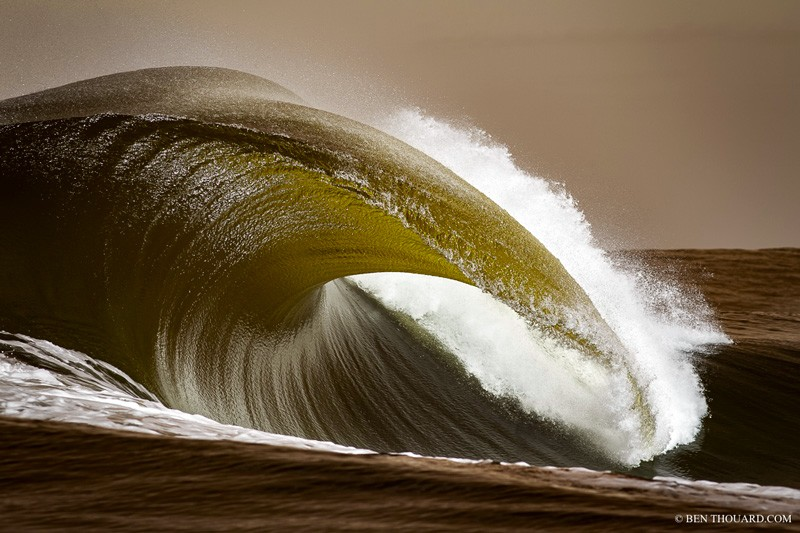

In [ ]:
image = cv2.imread(image_path[720])
image

In [ ]:
# Converting all images into numpy array
image_num_data=list()
for i in range(len(image_path)):
  image = cv2.imread(image_path[i])
  # Let us resize the image
  image=cv2.resize(src=image,dsize=(150,150), interpolation=cv2.INTER_LINEAR)
  image_num=np.array(image)
  image_flat=image_num.flatten()
  image_num_data.append(image_flat)

In [ ]:
# Lets us check the datatype of image_num_data
type(image_num_data)

list

In [ ]:
# Converting into numpy array
image_array = np.array(image_num_data)
image_array

array([[219, 185,  92, ..., 205, 106,  24],
       [205, 205, 205, ..., 252, 254, 254],
       [253, 255, 255, ..., 160, 112,  42],
       ...,
       [144, 112, 101, ..., 100,  81,  66],
       [172, 145, 137, ...,  16,  27,  53],
       [237, 214, 166, ..., 145, 131,  88]], dtype=uint8)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=1000,random_state=42)
x_reduced=pca.fit_transform(image_array)

In [ ]:
non_spill_df = pd.DataFrame(x_reduced)
non_spill_df = df.sample(frac = 1, random_state=42, ignore_index = True)
non_spill_df

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,target
0,-9892.330993,-5998.864031,6295.461184,3721.945257,-1943.414464,3957.898664,1475.110563,-3501.605044,350.428547,-2781.406197,...,-3.202276e-12,3.851420e-13,1.447273e-12,6.042291e-13,-1.039363e-12,-1.269799e-12,-1.567028e-12,-1.234922e-12,-1.942171e-12,Oil Spilled
1,1193.400748,1153.738963,-2835.283775,2586.663431,1688.101050,804.235339,-3991.299069,-2227.742433,1599.008037,885.134330,...,-5.406259e-13,-4.261815e-13,4.242930e-13,3.992058e-13,4.875845e-13,2.929902e-13,-1.482758e-12,-8.250040e-13,-7.638130e-13,Oil Spilled
2,18386.619280,-2608.691870,356.675035,-167.499043,-5627.048987,-3159.802785,-847.034199,3386.727990,2047.928997,-808.505066,...,-1.464572e-12,6.883563e-13,-1.566774e-12,-2.271515e-13,-6.125804e-13,-4.730038e-13,2.550803e-13,6.438379e-13,2.004209e-12,Oil Spilled
3,11259.896977,8993.605342,216.283202,842.248519,4347.653581,1950.000036,-2550.220814,-2126.918467,-1976.442265,-193.169358,...,1.097040e-12,9.110588e-13,-1.385706e-13,-2.308674e-13,-2.451082e-13,-1.772046e-13,-3.357426e-13,-5.840155e-13,2.027857e-13,Oil Spilled
4,9003.724815,-1867.005037,1371.860177,2637.987002,1960.112383,2554.824172,-4134.196513,3941.658671,3628.294286,1620.740076,...,2.787781e-13,-5.445674e-13,7.466127e-13,5.267786e-13,3.886709e-14,-6.147421e-14,3.060309e-13,-4.687951e-13,-2.787307e-14,Oil Spilled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,6459.294230,2603.222496,1991.823375,2164.741028,2999.538821,-3099.489448,-1469.737571,1271.695903,-764.697063,1489.229777,...,-8.574427e-13,-2.346584e-15,8.536707e-13,3.478669e-13,-7.693973e-13,5.238330e-13,7.352253e-13,2.072856e-13,-6.435010e-13,Oil Spilled
1405,12726.779952,5757.589788,2431.645946,-4008.957216,4418.029532,886.392579,-598.854337,-2261.228834,3445.961786,628.903912,...,1.447704e-12,-7.451744e-13,1.466168e-12,1.007375e-12,-1.165131e-12,-4.830414e-13,3.194903e-13,-6.131565e-13,-3.469765e-13,Oil Spilled
1406,-20680.499686,6356.093029,-3661.750818,2533.342099,3729.248042,-1152.571382,195.431063,-2167.056038,812.349732,94.941285,...,3.119577e-16,-1.193026e-15,-2.017022e-15,1.385517e-15,1.397623e-17,-7.193489e-16,-1.869082e-15,3.648376e-15,-9.237656e-16,Oil Spilled
1407,-9182.844002,3307.909035,-14008.832699,1843.805048,2533.312006,2292.659257,646.920048,-1764.507547,-1584.788908,-461.865041,...,-1.795632e-12,6.028804e-13,-1.143914e-12,-3.866823e-12,-1.164761e-13,-1.956726e-12,3.019535e-13,-1.085275e-14,-3.940086e-12,Oil Spilled


In [ ]:
non_spill_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Columns: 1001 entries, 0 to target
dtypes: float64(1000), object(1)
memory usage: 10.8+ MB


In [ ]:
non_spill_df.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,target
0,-9892.330993,-5998.864031,6295.461184,3721.945257,-1943.414464,3957.898664,1475.110563,-3501.605044,350.428547,-2781.406197,...,-3.202276e-12,3.851420e-13,1.447273e-12,6.042291e-13,-1.039363e-12,-1.269799e-12,-1.567028e-12,-1.234922e-12,-1.942171e-12,Oil Spilled
1,1193.400748,1153.738963,-2835.283775,2586.663431,1688.101050,804.235339,-3991.299069,-2227.742433,1599.008037,885.134330,...,-5.406259e-13,-4.261815e-13,4.242930e-13,3.992058e-13,4.875845e-13,2.929902e-13,-1.482758e-12,-8.250040e-13,-7.638130e-13,Oil Spilled
2,18386.619280,-2608.691870,356.675035,-167.499043,-5627.048987,-3159.802785,-847.034199,3386.727990,2047.928997,-808.505066,...,-1.464572e-12,6.883563e-13,-1.566774e-12,-2.271515e-13,-6.125804e-13,-4.730038e-13,2.550803e-13,6.438379e-13,2.004209e-12,Oil Spilled
3,11259.896977,8993.605342,216.283202,842.248519,4347.653581,1950.000036,-2550.220814,-2126.918467,-1976.442265,-193.169358,...,1.097040e-12,9.110588e-13,-1.385706e-13,-2.308674e-13,-2.451082e-13,-1.772046e-13,-3.357426e-13,-5.840155e-13,2.027857e-13,Oil Spilled
4,9003.724815,-1867.005037,1371.860177,2637.987002,1960.112383,2554.824172,-4134.196513,3941.658671,3628.294286,1620.740076,...,2.787781e-13,-5.445674e-13,7.466127e-13,5.267786e-13,3.886709e-14,-6.147421e-14,3.060309e-13,-4.687951e-13,-2.787307e-14,Oil Spilled


In [ ]:
non_spill_df["target"]="Non Oil Spilled"

In [ ]:
import pandas as pd
image_df = pd.concat([df,non_spill_df])
image_df

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,target
0,-4430.526448,-6956.641236,-4754.865200,-4033.089371,1312.129382,-2074.475859,2687.089574,-1662.671034,3620.267547,-840.848316,...,3.119577e-16,-1.193026e-15,-2.017022e-15,1.385517e-15,1.397623e-17,-7.193489e-16,-1.869082e-15,3.648376e-15,-9.237656e-16,Oil Spilled
1,-16009.919867,250.122007,176.569993,-2886.699892,429.211884,36.731108,380.409643,-694.667581,655.592561,2800.267647,...,8.516512e-13,-6.597869e-13,3.160755e-13,-1.596758e-13,1.066191e-13,-4.104594e-13,4.623897e-13,1.200543e-12,-1.123044e-12,Oil Spilled
2,1568.980427,2150.961128,-419.135476,-9473.091759,2887.252317,-729.247699,-3491.247163,2380.506133,-2429.696003,-2815.815876,...,-8.594932e-15,-3.981826e-13,-2.531584e-13,7.950271e-14,1.437748e-14,-3.880982e-13,-1.739515e-13,8.276021e-13,-7.062114e-13,Oil Spilled
3,20160.584460,3590.222197,4399.944007,221.981175,2614.816475,-4506.342980,440.490116,13.962106,149.351179,-1814.050666,...,8.043710e-13,-9.970401e-13,-1.159620e-12,1.163862e-12,9.054024e-13,1.314306e-12,-7.790996e-13,1.859242e-12,-4.629473e-14,Oil Spilled
4,-15555.060674,11014.133640,5081.471232,3842.619730,-982.168530,-1599.303914,256.777588,-5231.077731,-4654.657441,-2014.908656,...,-3.544660e-12,1.243252e-12,2.999912e-12,-1.327588e-12,1.428225e-12,-2.353110e-13,3.021539e-12,-1.995116e-12,3.224946e-12,Oil Spilled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,6459.294230,2603.222496,1991.823375,2164.741028,2999.538821,-3099.489448,-1469.737571,1271.695903,-764.697063,1489.229777,...,-8.574427e-13,-2.346584e-15,8.536707e-13,3.478669e-13,-7.693973e-13,5.238330e-13,7.352253e-13,2.072856e-13,-6.435010e-13,Non Oil Spilled
1405,12726.779952,5757.589788,2431.645946,-4008.957216,4418.029532,886.392579,-598.854337,-2261.228834,3445.961786,628.903912,...,1.447704e-12,-7.451744e-13,1.466168e-12,1.007375e-12,-1.165131e-12,-4.830414e-13,3.194903e-13,-6.131565e-13,-3.469765e-13,Non Oil Spilled
1406,-20680.499686,6356.093029,-3661.750818,2533.342099,3729.248042,-1152.571382,195.431063,-2167.056038,812.349732,94.941285,...,3.119577e-16,-1.193026e-15,-2.017022e-15,1.385517e-15,1.397623e-17,-7.193489e-16,-1.869082e-15,3.648376e-15,-9.237656e-16,Non Oil Spilled
1407,-9182.844002,3307.909035,-14008.832699,1843.805048,2533.312006,2292.659257,646.920048,-1764.507547,-1584.788908,-461.865041,...,-1.795632e-12,6.028804e-13,-1.143914e-12,-3.866823e-12,-1.164761e-13,-1.956726e-12,3.019535e-13,-1.085275e-14,-3.940086e-12,Non Oil Spilled


In [ ]:
image_df=image_df.sample(frac=1).reset_index(drop=True)

In [ ]:
image_df

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,target
0,3634.910671,2878.291547,4853.865731,-3059.382395,-2107.289195,-589.632004,1934.581508,4288.408477,-424.286564,-4289.579528,...,-5.232107e-13,-2.318203e-13,-1.699665e-13,-2.000914e-13,-1.577061e-13,-4.112468e-13,2.975414e-14,-1.134268e-13,-5.694001e-14,Non Oil Spilled
1,-3632.392738,6212.550338,-475.657130,202.823102,3074.099134,1131.721280,-1457.679432,-1591.105505,-1381.816103,-708.791130,...,5.461408e-13,1.217569e-12,4.070132e-13,8.264682e-13,-2.678915e-12,1.795344e-12,1.916031e-13,5.659765e-13,6.107108e-13,Non Oil Spilled
2,-6051.933278,-641.381166,3666.066723,-4125.014997,3446.122464,-1987.561807,-3260.650194,2878.582036,-1704.038848,549.263733,...,3.119577e-16,-1.193026e-15,-2.017022e-15,1.385517e-15,1.397623e-17,-7.193489e-16,-1.869082e-15,3.648376e-15,-9.237656e-16,Oil Spilled
3,409.052226,-1285.493161,-666.802287,-160.079541,626.231060,1921.255986,-383.672001,-1794.372812,1821.562066,-974.570496,...,-2.579097e-13,1.372412e-13,3.564361e-13,-2.188591e-13,-3.693933e-13,1.508779e-13,3.230052e-13,-4.270322e-13,-3.696130e-14,Non Oil Spilled
4,12606.812247,-7874.220676,-8091.046809,186.432243,-571.289546,-1051.735755,-2825.849000,-2816.512201,-359.877894,1243.380997,...,1.840895e-13,-7.313757e-14,-6.293517e-13,2.562909e-13,-1.015877e-13,4.455584e-14,5.260721e-14,6.935352e-14,-3.676375e-13,Non Oil Spilled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2813,7621.935828,-11203.702748,848.222286,710.501367,-1007.472223,3924.688014,2927.859516,-1072.723254,1288.765595,-1626.936065,...,-3.403454e-13,-3.666840e-13,-8.145501e-13,9.060665e-13,-9.122943e-13,-1.828315e-12,1.351619e-12,-5.340197e-13,-1.312973e-12,Non Oil Spilled
2814,12726.779952,5757.589788,2431.645946,-4008.957216,4418.029532,886.392579,-598.854337,-2261.228834,3445.961786,628.903912,...,-2.572644e-13,-5.808046e-14,-1.744841e-13,-1.378208e-13,3.563419e-13,-6.918533e-14,2.081619e-14,9.983656e-14,-1.124085e-14,Oil Spilled
2815,14591.987680,-1136.811416,1259.371070,-2110.693433,-3058.220667,403.271020,5159.157109,4609.891195,-2625.881767,-4496.697010,...,3.347811e-12,7.289456e-13,2.154099e-12,3.776587e-12,-1.177881e-13,-6.566334e-13,-1.641376e-12,-1.768705e-12,2.107717e-14,Non Oil Spilled
2816,4249.643877,-4501.898872,-4880.247416,-2598.686310,-392.430160,-2190.390218,-2130.303120,1119.090578,-1259.125094,-444.339323,...,2.236699e-13,3.303232e-13,1.988676e-13,-1.389683e-13,-3.160597e-13,-3.701970e-13,9.279811e-14,-4.674269e-14,3.861844e-13,Oil Spilled


In [ ]:
image_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,target
0,3634.910671,2878.291547,4853.865731,-3059.382395,-2107.289195,-589.632004,1934.581508,4288.408477,-424.286564,-4289.579528,...,-5.232107e-13,-2.318203e-13,-1.699665e-13,-2.000914e-13,-1.577061e-13,-4.112468e-13,2.975414e-14,-1.134268e-13,-5.694001e-14,Non Oil Spilled
1,-3632.392738,6212.550338,-475.657130,202.823102,3074.099134,1131.721280,-1457.679432,-1591.105505,-1381.816103,-708.791130,...,5.461408e-13,1.217569e-12,4.070132e-13,8.264682e-13,-2.678915e-12,1.795344e-12,1.916031e-13,5.659765e-13,6.107108e-13,Non Oil Spilled
2,-6051.933278,-641.381166,3666.066723,-4125.014997,3446.122464,-1987.561807,-3260.650194,2878.582036,-1704.038848,549.263733,...,3.119577e-16,-1.193026e-15,-2.017022e-15,1.385517e-15,1.397623e-17,-7.193489e-16,-1.869082e-15,3.648376e-15,-9.237656e-16,Oil Spilled
3,409.052226,-1285.493161,-666.802287,-160.079541,626.231060,1921.255986,-383.672001,-1794.372812,1821.562066,-974.570496,...,-2.579097e-13,1.372412e-13,3.564361e-13,-2.188591e-13,-3.693933e-13,1.508779e-13,3.230052e-13,-4.270322e-13,-3.696130e-14,Non Oil Spilled
4,12606.812247,-7874.220676,-8091.046809,186.432243,-571.289546,-1051.735755,-2825.849000,-2816.512201,-359.877894,1243.380997,...,1.840895e-13,-7.313757e-14,-6.293517e-13,2.562909e-13,-1.015877e-13,4.455584e-14,5.260721e-14,6.935352e-14,-3.676375e-13,Non Oil Spilled
5,943.426038,-3369.567396,-158.557722,-2913.018489,-3247.291082,2065.766442,8206.149389,4039.589766,-196.724166,-1288.722862,...,2.162986e-12,-1.840327e-13,2.510887e-12,1.903559e-12,-1.922354e-12,1.528235e-13,2.847916e-12,1.606013e-12,3.682279e-13,Non Oil Spilled
6,12669.751769,13122.233613,7806.883488,435.664592,-34.217476,-1708.933863,-2752.020771,328.132622,-815.710150,1174.349514,...,3.462936e-13,-4.820203e-13,7.816573e-15,1.846943e-13,3.901429e-13,-6.467408e-13,-1.782923e-13,-5.547307e-13,-6.689525e-13,Non Oil Spilled
7,3128.602606,-4600.456440,7700.989481,2333.145652,-1820.152398,3969.495227,884.961833,-3661.325047,-448.583360,-2190.628265,...,-1.168641e-13,1.394250e-13,-3.570829e-13,-7.594581e-13,-2.362243e-13,-2.392100e-13,2.839507e-13,3.565072e-13,2.010126e-13,Non Oil Spilled
8,-4430.526448,-6956.641236,-4754.865200,-4033.089371,1312.129382,-2074.475859,2687.089574,-1662.671034,3620.267547,-840.848316,...,3.119577e-16,-1.193026e-15,-2.017022e-15,1.385517e-15,1.397623e-17,-7.193489e-16,-1.869082e-15,3.648376e-15,-9.237656e-16,Oil Spilled
9,11644.203737,-2206.411251,1179.031863,634.507836,2208.214067,7646.929381,5121.811746,-6068.994252,-4370.071888,284.574465,...,-1.414568e-13,-4.257927e-13,5.159024e-13,2.066866e-14,-5.754736e-14,4.654839e-13,-5.628159e-13,1.793087e-13,1.429225e-13,Oil Spilled


In [ ]:
image_df.to_csv("Image_classification.csv")

In [ ]:
import pandas as pd
image_df = pd.read_csv("//content/Image_classification.csv")

In [ ]:
# Selecting the target
y = image_df["target"]
x = image_df.drop("target", axis = 1)

In [ ]:
# Splitting the train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2254, 1001)
(564, 1001)
(2254,)
(564,)


In [ ]:
X_train.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,990,991,992,993,994,995,996,997,998,999
961,961,-11819.317039,7460.321467,-2673.019026,1974.934126,-3529.346783,7037.556676,2555.166449,-527.616761,724.577770,...,-1.679909e-12,4.817370e-13,1.457589e-13,-1.527745e-12,4.406375e-13,-1.063902e-12,7.520978e-13,-5.306647e-14,1.696336e-13,4.093513e-13
2739,2739,4323.380554,2591.429564,3002.847455,4742.154601,530.873823,341.431735,214.484488,982.268666,-743.291335,...,-2.691439e-15,3.119577e-16,-1.193026e-15,-2.017022e-15,1.385517e-15,1.397623e-17,-7.193489e-16,-1.869082e-15,3.648376e-15,-9.237656e-16
946,946,12726.779952,5757.589788,2431.645946,-4008.957216,4418.029532,886.392579,-598.854337,-2261.228834,3445.961786,...,-9.171200e-14,-2.572644e-13,-5.808046e-14,-1.744841e-13,-1.378208e-13,3.563419e-13,-6.918533e-14,2.081619e-14,9.983656e-14,-1.124085e-14
2314,2314,17530.754409,-4456.903726,2981.408129,12.282823,-4302.931590,-2931.857389,1240.102273,1869.004605,1255.353272,...,1.755241e-13,-4.887321e-13,7.340802e-14,2.421322e-13,-2.845337e-13,3.620120e-13,1.646351e-12,5.679397e-13,1.305014e-12,-7.484976e-13
2663,2663,10915.499701,-4819.596914,-1634.532576,-417.621689,-154.760237,-5674.436226,1158.302425,1577.040055,-842.013382,...,1.385339e-13,7.540242e-13,4.423804e-13,9.399772e-13,-1.203619e-12,6.477026e-13,-4.046970e-13,1.450739e-13,-7.083740e-13,5.083008e-13


In [ ]:
X_test.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,990,991,992,993,994,995,996,997,998,999
1411,1411,17002.690286,-1096.656372,-4773.924291,976.250800,-1401.382595,1468.137444,-2607.798164,646.219460,921.426422,...,-2.691439e-15,3.119577e-16,-1.193026e-15,-2.017022e-15,1.385517e-15,1.397623e-17,-7.193489e-16,-1.869082e-15,3.648376e-15,-9.237656e-16
2291,2291,-16463.401218,369.996337,-380.546286,-3023.185660,433.147211,190.222831,474.617516,-552.961630,416.257108,...,-2.691439e-15,3.119577e-16,-1.193026e-15,-2.017022e-15,1.385517e-15,1.397623e-17,-7.193489e-16,-1.869082e-15,3.648376e-15,-9.237656e-16
2238,2238,6642.400896,2300.063155,92.360780,2194.011528,-1040.708815,-6197.946513,-607.011046,-2685.870136,-285.032973,...,-2.691439e-15,3.119577e-16,-1.193026e-15,-2.017022e-15,1.385517e-15,1.397623e-17,-7.193489e-16,-1.869082e-15,3.648376e-15,-9.237656e-16
944,944,12398.980510,-3287.970601,-1491.429179,85.165245,-1573.132550,-1765.052250,-284.061496,248.297302,-535.356872,...,3.218405e-13,-1.499021e-14,6.971604e-14,6.918552e-13,7.980371e-13,3.017077e-14,-6.824812e-14,-8.030324e-14,1.037563e-13,-1.862390e-13
2518,2518,-872.744853,325.504340,17664.014995,5236.888795,-3592.132263,-634.548467,-2563.027899,-3703.134919,544.416100,...,3.200812e-13,4.806453e-13,-6.182166e-13,1.158090e-12,1.350667e-12,-7.985520e-13,6.990347e-14,8.234435e-13,-4.272273e-13,4.995087e-13


In [ ]:
# Doing feature scaling
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
encoder = ColumnTransformer(
    transformers=[("scaler", StandardScaler(), slice(0, X_train.shape[1]))],
    remainder="passthrough"
)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline(steps=[
    ('pca', PCA(n_components=1000)),
    ('encoder', encoder),
    ('model', LogisticRegression(max_iter=1000))  # Replace with your classifier
])

In [ ]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('pca', PCA(n_components=1000)),
                ('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  slice(0, 1001, None))])),
                ('model', LogisticRegression(max_iter=1000))])

In [ ]:
# Make Prediction
y_pred = pipeline.predict(X_test)
y_pred

array(['Non Oil Spilled', 'Oil Spilled', 'Non Oil Spilled', 'Oil Spilled',
       'Oil Spilled', 'Oil Spilled', 'Oil Spilled', 'Oil Spilled',
       'Non Oil Spilled', 'Non Oil Spilled', 'Non Oil Spilled',
       'Oil Spilled', 'Oil Spilled', 'Oil Spilled', 'Non Oil Spilled',
       'Oil Spilled', 'Non Oil Spilled', 'Non Oil Spilled',
       'Non Oil Spilled', 'Oil Spilled', 'Non Oil Spilled', 'Oil Spilled',
       'Oil Spilled', 'Oil Spilled', 'Non Oil Spilled', 'Oil Spilled',
       'Oil Spilled', 'Non Oil Spilled', 'Non Oil Spilled',
       'Non Oil Spilled', 'Oil Spilled', 'Non Oil Spilled',
       'Non Oil Spilled', 'Non Oil Spilled', 'Oil Spilled',
       'Non Oil Spilled', 'Oil Spilled', 'Oil Spilled', 'Oil Spilled',
       'Oil Spilled', 'Oil Spilled', 'Non Oil Spilled', 'Oil Spilled',
       'Non Oil Spilled', 'Non Oil Spilled', 'Non Oil Spilled',
       'Oil Spilled', 'Oil Spilled', 'Oil Spilled', 'Non Oil Spilled',
       'Non Oil Spilled', 'Oil Spilled', 'Oil Spilled', 'Non

In [ ]:
# VAlidating the Model
from sklearn.metrics import classification_report
score = classification_report(y_test,y_pred)
print(score)

                 precision    recall  f1-score   support

Non Oil Spilled       0.23      0.23      0.23       280
    Oil Spilled       0.22      0.21      0.22       284

       accuracy                           0.22       564
      macro avg       0.22      0.22      0.22       564
   weighted avg       0.22      0.22      0.22       564



In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score is:", accuracy)

Accuracy Score is: 0.22340425531914893


In [ ]:
import joblib # Changed from pickle
import pandas as pd
import gradio as gr
from sklearn.linear_model import LogisticRegression

# Load existing pipeline
with open("oil_spill_pipeline1.pkl", "rb") as f:
    base_model = joblib.load(f) # Changed from pickle.load

# New model (just example, normally you retrain)
extra_model = LogisticRegression()

def predict_ensemble(*features):
    features = [float(f) for f in features]
    data = pd.DataFrame([features])

    pred1 = base_model.predict(data)[0]
    pred2 = extra_model.predict(data)[0]  # after training

    # Simple majority voting
    final_pred = 1 if (pred1 + pred2) >= 1 else 0
    return "Oil Spill Detected ✅" if final_pred == 1 else "No Oil Spill ❌"

In [ ]:
import joblib
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline(steps=[
    ('pca', PCA(n_components=1000, random_state=42)),  # PCA inside pipeline
    ('encoder', encoder),
    ('model', LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train, y_train)

# Save full pipeline (includes PCA now!)
joblib.dump(pipeline, "oil_spill_pipeline1.pkl")

['oil_spill_pipeline1.pkl']

In [ ]:
# ==============================
# Oil Spill Image Classification - Training Code
# ==============================

import cv2
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import joblib

# -------------------------
# 1. Check Labels in Data
# -------------------------
print("Unique labels and their counts in the dataset:")
print(image_df['target'].value_counts())

# -------------------------
# 2. Features and Labels
# -------------------------
# Drop the label column to get features
X = image_df.drop(columns=['target']).values
y = image_df['target'].values   # labels (Non Oil Spilled / Oil Spilled)

print("\nShape of features (X):", X.shape)
print("Shape of labels (y):", y.shape)

# -------------------------
# 3. Train/Test Split
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\n✅ Train/Test split completed")
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

# -------------------------
# 4. Build Pipeline
# -------------------------
pipeline = Pipeline(steps=[
    ('pca', PCA(n_components=1000, random_state=42)),   # reduce dimensionality
    ('scaler', StandardScaler()),                       # scale features
    ('model', LogisticRegression(max_iter=5000))        # classifier
])

# -------------------------
# 5. Train Model
# -------------------------
print("\n🚀 Training the model...")
pipeline.fit(X_train, y_train)
print("✅ Model training completed!")

# -------------------------
# 6. Save Full Pipeline
# -------------------------
joblib.dump(pipeline, "oil_spill_pipeline.pkl")
print("✅ Model saved as oil_spill_pipeline.pkl")


Unique labels and their counts in the dataset:
target
Non Oil Spilled    1409
Oil Spilled        1409
Name: count, dtype: int64

Shape of features (X): (2818, 1001)
Shape of labels (y): (2818,)

✅ Train/Test split completed
Train shape: (2254, 1001) (2254,)
Test shape: (564, 1001) (564,)

🚀 Training the model...
✅ Model training completed!
✅ Model saved as oil_spill_pipeline.pkl


In [ ]:
import pickle
with open("oil_spill_pipeline1.pkl", "wb") as f:
    pickle.dump(pipeline, f)

In [ ]:
# ==========================
# Evaluate Model
# ==========================
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions
y_pred = pipeline.predict(X_test)

# Metrics
print("\n📊 Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



📊 Model Evaluation:
Accuracy: 0.18439716312056736

Classification Report:
                  precision    recall  f1-score   support

Non Oil Spilled       0.21      0.22      0.21       282
    Oil Spilled       0.16      0.15      0.15       282

       accuracy                           0.18       564
      macro avg       0.18      0.18      0.18       564
   weighted avg       0.18      0.18      0.18       564


Confusion Matrix:
 [[ 62 220]
 [240  42]]


In [ ]:
print(image_df['target'].value_counts())

target
Non Oil Spilled    1409
Oil Spilled        1409
Name: count, dtype: int64
